In [1]:
import pandas as pd
import numpy as np
import datetime as dt # so that pandas can recognize dates properly
import matplotlib.pyplot as plt # for visualization
from matplotlib import style
import pandas_datareader.data as web # to collect data

In [2]:
style.use('ggplot')
tickers = ['TSLA', 'BAC']
start = dt.datetime(2014, 1, 1)
end = dt.datetime(2020, 11, 20)
returns = pd.DataFrame() # create an empty data frame, returns.
returns

""


# Portfolio Optimization:
Optimal portfolio has the highest sharpe ratio
- [**Data**](#Data): Extract the data online and organize it in the data frame.


## Data

In [3]:
for ticker in tickers:
    data = web.DataReader(ticker, 'yahoo', start, end)
data
# Loop will run for the first time for TSLA, extracts the data from yahoo finance and store it in data 
#frame, data. The loop will then run for BAC, extracts the data from yahoo finance and replace the data
# in data frame, data. This is not the dataframe that we want at the end since it will contain data of
# only BAC, the last ticker in the tickers list.

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-12-31,15.620000,15.510000,15.600000,15.570000,57188900.0,13.512723
2014-01-02,16.160000,15.680000,15.690000,16.100000,148709900.0,13.972695
2014-01-03,16.500000,16.230000,16.270000,16.410000,129921800.0,14.241736
2014-01-06,16.730000,16.559999,16.629999,16.660000,114431300.0,14.458703
2014-01-07,16.790001,16.450001,16.770000,16.500000,110605100.0,14.319841
...,...,...,...,...,...,...
2020-11-16,28.000000,27.180000,27.860001,27.580000,57396700.0,26.760628
2020-11-17,27.600000,27.010000,27.250000,27.549999,46402300.0,26.731520
2020-11-18,27.930000,26.959999,27.629999,26.980000,54416700.0,26.178455


In [4]:
for ticker in tickers:
    data = web.DataReader(ticker, 'yahoo', start, end)
    data[ticker] = data['Adj Close'].pct_change() # add a column to data frame, data, and store returns in it.

# pd.set_option('display.max_rows', None)
data
# still same number of rows as above, so values of one firm (TSLA) replace by another firm (BAC).

,High,Low,Open,Close,Volume,Adj Close,BAC
Date,,,,,,,
2013-12-31,15.620000,15.510000,15.600000,15.570000,57188900.0,13.512724,NaN
2014-01-02,16.160000,15.680000,15.690000,16.100000,148709900.0,13.972698,0.034040
2014-01-03,16.500000,16.230000,16.270000,16.410000,129921800.0,14.241734,0.019254
2014-01-06,16.730000,16.559999,16.629999,16.660000,114431300.0,14.458705,0.015235
2014-01-07,16.790001,16.450001,16.770000,16.500000,110605100.0,14.319847,-0.009604
...,...,...,...,...,...,...,...
2020-11-16,28.000000,27.180000,27.860001,27.580000,57396700.0,26.760630,0.021481
2020-11-17,27.600000,27.010000,27.250000,27.549999,46402300.0,26.731520,-0.001088
2020-11-18,27.930000,26.959999,27.629999,26.980000,54416700.0,26.178453,-0.020690


In [5]:
13.972697 / 13.512726 - 1

# just for confirmation of the return above.

0.034039837705582165

In [6]:
for ticker in tickers:
    data = web.DataReader(ticker, 'yahoo', start, end) 
    data[ticker] = data['Adj Close'].pct_change()
    
    if returns.empty:
        returns = data[[ticker]]
    else:
        returns = returns.join(data[[ticker]], how = 'outer')
data
# loop first running for TSLA, extracting its data from yahoo finance from the start to the end dates 
# and then storing it in a data frame, data. Next, data[ticker] = data[TSLA] column is created which
# contains percentage changes in the Adj Close of TSLA. Next, if-else is evaluated. In the if statement,
# returns.empty outputs True since the data frame, returns, is yet empty, which sets the data frame,
# returns, equal to data[[ticker]] or more precisely to data[[TSLA]]. This finishes the first loop.

# Then the loop runs for BAC, extracting its data from yahoo finance from the start to the end dates
# and then storing it in a data frame, data. Next, data[ticker] = data[BAC] column is created which
# is set equal to percentage changes in the Adj Close of BAC. Next, if-else is evaluated. In the if
# statement,returns.empty turns out to be False this time, therefore, else is executed, where the data 
# frame, returns which already contains the data for TSLA, now takes the data from data[[ticker]] which
# is this time equal to data[[BAC]]. Thus, the data frame, returns, now contains two columns. The first one
# contains percent changes (net returns) of TSLA and the second one contains the percent changes (net returns) of
# BAC.

# The data frame, data, will still contain 1,737 rows since it contains data only for BAC.

# The data frame, returns, will contain 1,737 rows but then two columns, one for TSLA and the other for
# BAC.

,High,Low,Open,Close,Volume,Adj Close,BAC
Date,,,,,,,
2013-12-31,15.620000,15.510000,15.600000,15.570000,57188900.0,13.512728,NaN
2014-01-02,16.160000,15.680000,15.690000,16.100000,148709900.0,13.972696,0.034040
2014-01-03,16.500000,16.230000,16.270000,16.410000,129921800.0,14.241739,0.019255
2014-01-06,16.730000,16.559999,16.629999,16.660000,114431300.0,14.458703,0.015234
2014-01-07,16.790001,16.450001,16.770000,16.500000,110605100.0,14.319849,-0.009603
...,...,...,...,...,...,...,...
2020-11-16,28.000000,27.180000,27.860001,27.580000,57396700.0,26.760630,0.021481
2020-11-17,27.600000,27.010000,27.250000,27.549999,46402300.0,26.731522,-0.001088
2020-11-18,27.930000,26.959999,27.629999,26.980000,54416700.0,26.178453,-0.020690


In [7]:
returns

,TSLA,BAC
Date,,
2013-12-31,NaN,NaN
2014-01-02,-0.002194,0.034040
2014-01-03,-0.003598,0.019255
2014-01-06,-0.017117,0.015234
2014-01-07,0.016054,-0.009603
...,...,...
2020-11-16,-0.001004,0.021481
2020-11-17,0.082139,-0.001088
2020-11-18,0.101968,-0.020690


In [8]:
type(returns)

pandas.core.frame.DataFrame

## Determine the portfolio weights:

In [9]:
number_of_portfolios = 5
for portfolio in range(number_of_portfolios):
    weights = np.random.random_sample(len(tickers))
    print(weights)
    
# Loop will run the first time for 0 and put 0 in portfolio variable. Then, np.random.random_sample(2) will run
# and produce two random numbers and store them in the variable, weights. The loop then runs for 1 in portfolio
# variable, np.random.random_sample(2) generates two random numbers and store them in the variable, weights again.
# The loop runs 5 times in total from 0 to 4. Thus, the variable, weights, contain 5 sets of 2 random numbers and
# each set can be viewed as a seperate portfolio. Hence, the total number of portfolios is equal to 5.

# But now the problem is each portfolio weight is either less than or greater than 1 or 100 percent. We overcome 
# this problem in the following as:

[0.76446161 0.37782433]
[0.86330609 0.64115525]
[0.98124226 0.76649199]
[0.58351665 0.70439085]
[0.09556721 0.84555058]


In [10]:
weights

array([0.09556721, 0.84555058])

In [11]:
weights[0] + weights[1] # these will change every time we run the cells above.

0.941117785133944

In [12]:
np.sum(weights)

0.941117785133944

In [13]:
weights / np.sum(weights) # to impose constraint on weights to be equal to 1.

array([0.10154649, 0.89845351])

In [14]:
weights = weights / np.sum(weights)

In [15]:
weights[0] + weights[1] # Now the sum of the weights invested in both the assets is precesiely equal to 1.

1.0

In [16]:
weights = 0 # to start fresh for the following loop.
weights

0

In [17]:
number_of_portfolios = 5
for portfolio in range(number_of_portfolios):
    weights = np.random.random_sample(len(tickers))
    weights = weights / np.sum(weights)
    print(weights)
    
# Now the weights invested in each portfolio is equal to 1.

[0.31137652 0.68862348]
[0.41630844 0.58369156]
[0.64098423 0.35901577]
[0.3314197 0.6685803]
[0.82199654 0.17800346]


In [18]:
portfolio_return = []
portfolio_risk = []
sharpe_ratio = []
portfolio_weights = []
rf = 0

In [19]:
weights = 0 # to start fresh for the following loop.
weights

0

In [20]:
number_of_portfolios = 5
for portfolio in range(number_of_portfolios):
    # Generate random portfolio weights
    weights = np.random.random_sample(len(tickers))
    weights = np.round((weights / np.sum(weights)), 3) # round-off to 3 decimal points
    portfolio_weights.append(weights)

print(portfolio_weights)

[array([0.342, 0.658]), array([0.489, 0.511]), array([0.689, 0.311]), array([0.489, 0.511]), array([0.536, 0.464])]


## Compute Annualized Portfolio Returns:

In [21]:
returns # the data frame, returns, contains daily returns of the 2 stocks.

,TSLA,BAC
Date,,
2013-12-31,NaN,NaN
2014-01-02,-0.002194,0.034040
2014-01-03,-0.003598,0.019255
2014-01-06,-0.017117,0.015234
2014-01-07,0.016054,-0.009603
...,...,...
2020-11-16,-0.001004,0.021481
2020-11-17,0.082139,-0.001088
2020-11-18,0.101968,-0.020690


In [22]:
returns.mean() 
# generates daily mean return for the two stocks. TSLA on average generates a daily return of $0.0022 per dollar
# investment or $0.22 per 100 dollar investment.

TSLA    0.002186
BAC     0.000582
dtype: float64

In [23]:
weights # the weights of both the assets in a portfolio.

array([0.536, 0.464])

In [24]:
weights[0], weights[1]

(0.536, 0.464)

In [25]:
0.002186 * weights[0] + 0.000582 * weights[1] 
# Portfolio of these weights generate daily expected return of $0.0014 per dollar investment or return of $0.14 
# per 100 dollar investment.

0.001441744

In [26]:
np.sum(returns.mean() * weights) 

# generates the portfolio's daily expected return given the means and weights. We cannot change the mean daily 
# returns but can change the weights, which will change the portfolio's expected return.

# Investing 52.7% of the total available funds in TSLA and 47.3% in BAC has the expected daily portfolio return of
# $0.00143 per dollar of investment or $0.143 per 100 dollars of investment. 

0.0014415462000571576

In [27]:
np.sum(returns.mean() * weights) * 252 
# 252 days since stock markets usally trade for 252 days in a year.
# generates annualized return of the portfolio. So, $1 invested in this portfolio is expected to generate a return
# of almost $0.25 in a year or $100 invested in this portfolio is expected to generate a return of almost $25 in a
# year.

0.36326964241440374

In [31]:
portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights, rf, weights

([], [], [], [], 0, 0)

In [29]:
portfolio_return = []
portfolio_risk = []
sharpe_ratio = []
portfolio_weights = []
rf = 0

# to start fresh for the following loop.

In [30]:
weights = 0

In [32]:
number_of_portfolios = 5
for portfolio in range(number_of_portfolios):
    # Generate random portfolio weights
    weights = np.random.random_sample(len(tickers))
    weights = np.round((weights / np.sum(weights)), 3) # round-off to 3 decimal points
    portfolio_weights.append(weights)
    #Generate annualized portfolio return
    annualized_return = np.sum(returns.mean() * weights) * 252
    annualized_return = np.round((annualized_return), 3)
    portfolio_return.append(annualized_return)

print(portfolio_weights)
print(portfolio_return)

[array([0.592, 0.408]), array([0.373, 0.627]), array([0.914, 0.086]), array([0.115, 0.885]), array([0.711, 0.289])]
[0.386, 0.297, 0.516, 0.193, 0.434]


## Compute Covariance Matrix and Portfolio's Risk:

In [33]:
returns

,TSLA,BAC
Date,,
2013-12-31,NaN,NaN
2014-01-02,-0.002194,0.034040
2014-01-03,-0.003598,0.019255
2014-01-06,-0.017117,0.015234
2014-01-07,0.016054,-0.009603
...,...,...
2020-11-16,-0.001004,0.021481
2020-11-17,0.082139,-0.001088
2020-11-18,0.101968,-0.020690


In [34]:
returns.cov()

,TSLA,BAC
TSLA,0.001160,0.000187
BAC,0.000187,0.000410


In [35]:
returns.cov() * 252

,TSLA,BAC
TSLA,0.292387,0.047138
BAC,0.047138,0.103215


In [36]:
covariance_matrix = returns.cov() * 252
covariance_matrix

,TSLA,BAC
TSLA,0.292387,0.047138
BAC,0.047138,0.103215


In [37]:
weights

array([0.711, 0.289])

In [38]:
weights.T # step A in excel.

array([0.711, 0.289])

In [39]:
np.dot(covariance_matrix, weights) # step B in excel.

array([0.22150982, 0.0633441 ])

In [40]:
np.dot(weights.T, np.dot(covariance_matrix, weights)) # step C in excel.

0.17579992918633272

In [41]:
portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
portfolio_variance

0.17579992918633272

In [42]:
standard_deviation = np.sqrt(portfolio_variance)
standard_deviation

0.4192850214190017

In [46]:
portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights, weights, annualized_return, rf

([], [], [], [], 0, 0, 0)

In [44]:
portfolio_return = []
portfolio_risk = []
sharpe_ratio = []
portfolio_weights = []
rf = 0

# to start fresh for the following loop.

In [45]:
weights = 0
annualized_return = 0

In [47]:
number_of_portfolios = 5
for portfolio in range(number_of_portfolios):
    # Generate random portfolio weights
    weights = np.random.random_sample(len(tickers))
    weights = np.round((weights / np.sum(weights)), 3) # round-off to 3 decimal points
    portfolio_weights.append(weights)
    #Generate annualized portfolio return
    annualized_return = np.sum(returns.mean() * weights) * 252
    portfolio_return.append(annualized_return)
    # Generate Portfolio risk
    covariance_matrix = returns.cov() * 252
    portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
    portfolio_standard_deviation = np.sqrt(portfolio_variance)
    portfolio_risk.append(portfolio_standard_deviation)

print(portfolio_weights)
print(portfolio_return)
print(portfolio_risk)

[array([0.77, 0.23]), array([0.531, 0.469]), array([0.112, 0.888]), array([0.309, 0.691]), array([0.402, 0.598])]
[0.45785624813159054, 0.3612485610956604, 0.1918819465849712, 0.2715125505434575, 0.3091046630720831]
[0.44216784321429065, 0.35864083326285673, 0.30730055658823646, 0.3119779665938841, 0.326840122980183]


## Compute Sharpe Ratio

In [48]:
annualized_return # the portfolio's expected annual return.

0.3091046630720831

In [49]:
rf

0

In [50]:
annualized_return - rf

0.3091046630720831

In [51]:
portfolio_standard_deviation

0.326840122980183

In [52]:
shrp_ratio = (annualized_return - rf) / portfolio_standard_deviation

In [53]:
shrp_ratio
# risk premium per unit of risk. The higher the shrp ratio is, the better it is.

0.9457365890503743

In [57]:
portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights, weights, annualized_return, rf

([], [], [], [], 0, 0, 0)

In [55]:
portfolio_return = []
portfolio_risk = []
sharpe_ratio = []
portfolio_weights = []
rf = 0

In [56]:
weights = 0
annualized_return = 0

In [58]:
number_of_portfolios = 5
for portfolio in range(number_of_portfolios):
    # Generate random portfolio weights
    weights = np.random.random_sample(len(tickers))
    weights = np.round((weights / np.sum(weights)), 3) # round-off to 3 decimal points
    portfolio_weights.append(weights)
    #Generate annualized portfolio return
    annualized_return = np.sum(returns.mean() * weights) * 252
    portfolio_return.append(annualized_return)
    # Generate Portfolio risk
    covariance_matrix = returns.cov() * 252
    portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
    portfolio_standard_deviation = np.sqrt(portfolio_variance)
    portfolio_risk.append(portfolio_standard_deviation)
    #Generate Sharpe Ratio
    shrp_ratio = (annualized_return - rf) / portfolio_standard_deviation
    sharpe_ratio.append(shrp_ratio)

print(portfolio_weights)
print(portfolio_return)
print(portfolio_risk)
print(sharpe_ratio)

[array([0.974, 0.026]), array([0.171, 0.829]), array([0.034, 0.966]), array([0.726, 0.274]), array([0.547, 0.453])]
[0.5403163659363175, 0.2157307061461422, 0.16035307801257556, 0.44007073252664936, 0.367716021315639]
[0.5289967371998008, 0.30470928363813504, 0.31583255020664375, 0.42498552827586666, 0.3633538901471868]
[1.0213982959449546, 0.7079886230258035, 0.507715490083778, 1.0354958069089604, 1.0120051863671673]


In [59]:
# Based on the Sharpe Ratio, the portfolio 5 is the best among all the five portfolios since it has the highest Sharpe 
# Ratio, thus, the highest risk premium it offers per unit of risk.

In [60]:
type(portfolio_weights), type(portfolio_return), type(portfolio_risk), type(sharpe_ratio)

(list, list, list, list)

In [61]:
portfolio_weights = np.array(portfolio_weights)
portfolio_return = np.array(portfolio_return)
portfolio_risk = np.array(portfolio_risk)
sharpe_ratio = np.array(sharpe_ratio)
# change the lists to numpy arrays for better data manipulations.

In [62]:
print(portfolio_weights)
print(portfolio_return)
print(portfolio_risk)
print(sharpe_ratio)

# list items are seperated by commas, where arrays elements are not it appears.

[[0.974 0.026]
 [0.171 0.829]
 [0.034 0.966]
 [0.726 0.274]
 [0.547 0.453]]
[0.54031637 0.21573071 0.16035308 0.44007073 0.36771602]
[0.52899674 0.30470928 0.31583255 0.42498553 0.36335389]
[1.0213983  0.70798862 0.50771549 1.03549581 1.01200519]


In [63]:
type(portfolio_weights), type(portfolio_return), type(portfolio_risk), type(sharpe_ratio)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [64]:
portfolio_metrics = [portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights]
portfolio_metrics

[array([0.54031637, 0.21573071, 0.16035308, 0.44007073, 0.36771602]),
 array([0.52899674, 0.30470928, 0.31583255, 0.42498553, 0.36335389]),
 array([1.0213983 , 0.70798862, 0.50771549, 1.03549581, 1.01200519]),
 array([[0.974, 0.026],
        [0.171, 0.829],
        [0.034, 0.966],
        [0.726, 0.274],
        [0.547, 0.453]])]

In [65]:
portfolio_df = pd.DataFrame(portfolio_metrics)
portfolio_df

# row 0 is portfolio_return, row 1 is portfolio_risk, row 3 is sharpe_ratio, and row 4 is portfolio_weights.

,0,1,2,3,4
0,0.540316,0.215731,0.160353,0.440071,0.367716
1,0.528997,0.304709,0.315833,0.424986,0.363354
2,1.021398,0.707989,0.507715,1.035496,1.012005
3,"[0.974, 0.026]","[0.171, 0.829]","[0.034, 0.966]","[0.726, 0.274]","[0.547, 0.453]"


In [66]:
portfolio_df = portfolio_df.T
portfolio_df

# now column 0 is portfolio_return, column 1 is portfolio_risk, column 2 is sharpe_ratio, and column 4 is portfolio
# _weights.

,0,1,2,3
0,0.540316,0.528997,1.021398,"[0.974, 0.026]"
1,0.215731,0.304709,0.707989,"[0.171, 0.829]"
2,0.160353,0.315833,0.507715,"[0.034, 0.966]"
3,0.440071,0.424986,1.035496,"[0.726, 0.274]"
4,0.367716,0.363354,1.012005,"[0.547, 0.453]"


In [67]:
portfolio_df.columns = ['Return', 'Risk', 'Sharpe', 'Weights']
portfolio_df

,Return,Risk,Sharpe,Weights
0,0.540316,0.528997,1.021398,"[0.974, 0.026]"
1,0.215731,0.304709,0.707989,"[0.171, 0.829]"
2,0.160353,0.315833,0.507715,"[0.034, 0.966]"
3,0.440071,0.424986,1.035496,"[0.726, 0.274]"
4,0.367716,0.363354,1.012005,"[0.547, 0.453]"


## Everything Together:

In [191]:
returns, portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights, rf, weights, annualized_return
# the data carried forward from previous work. It needs to be deleted to run the following loops.

(Empty DataFrame
 Columns: []
 Index: [],
 [],
 [],
 [],
 [],
 0,
 0,
 0)

In [192]:
returns = pd.DataFrame()
portfolio_return = []
portfolio_risk = []
sharpe_ratio = []
portfolio_weights = []
rf = 0
weights = 0
annualized_return = 0

In [193]:
tickers = ['TSLA', 'BAC']
returns = pd.DataFrame()

In [194]:
for ticker in tickers:
    data = web.DataReader(ticker, 'yahoo', start, end) 
    data[ticker] = data['Adj Close'].pct_change()
    
    if returns.empty:
        returns = data[[ticker]]
    else:
        returns = returns.join(data[[ticker]], how = 'outer')
        
returns

,TSLA,BAC
Date,,
2013-12-31,NaN,NaN
2014-01-02,-0.002194,0.034040
2014-01-03,-0.003598,0.019254
2014-01-06,-0.017117,0.015235
2014-01-07,0.016054,-0.009604
...,...,...
2020-11-16,-0.001004,0.021482
2020-11-17,0.082139,-0.001088
2020-11-18,0.101968,-0.020690


In [195]:
number_of_portfolios = 10000
for portfolio in range(number_of_portfolios):
    # Generate random portfolio weights
    weights = np.random.random_sample(len(tickers))
    weights = np.round((weights / np.sum(weights)), 3) # round-off to 3 decimal points
    portfolio_weights.append(weights)
    #Generate annualized portfolio return
    annualized_return = np.sum(returns.mean() * weights) * 252
    portfolio_return.append(annualized_return)
    # Generate Portfolio risk
    covariance_matrix = returns.cov() * 252
    portfolio_variance = np.dot(weights.T, np.dot(covariance_matrix, weights))
    portfolio_standard_deviation = np.sqrt(portfolio_variance)
    portfolio_risk.append(portfolio_standard_deviation)
    #Generate Sharpe Ratio
    shrp_ratio = (annualized_return - rf) / portfolio_standard_deviation
    sharpe_ratio.append(shrp_ratio)

# print(portfolio_weights)
# print(portfolio_return)
# print(portfolio_risk)
# print(sharpe_ratio)

# comment out the print statements since this is too much output.

In [196]:
portfolio_weights = np.array(portfolio_weights)
portfolio_return = np.array(portfolio_return)
portfolio_risk = np.array(portfolio_risk)
sharpe_ratio = np.array(sharpe_ratio)

In [197]:
# print(portfolio_weights)
# print(portfolio_return)
# print(portfolio_risk)
# print(sharpe_ratio)

# comment out these print statement since this will be too much of the output.

In [198]:
portfolio_metrics = [portfolio_return, portfolio_risk, sharpe_ratio, portfolio_weights]
#portfolio_metrics

# comment out printing of the portfolio_metrics due too much output.

In [199]:
portfolio_df = pd.DataFrame(portfolio_metrics)
#portfolio_df

In [200]:
portfolio_df = portfolio_df.T
#portfolio_df

In [201]:
portfolio_df.columns = ['Return', 'Risk', 'Sharpe', 'Weights']
portfolio_df

,Return,Risk,Sharpe,Weights
0,0.405712,0.39387,1.030068,"[0.641, 0.359]"
1,0.536274,0.524518,1.022413,"[0.964, 0.036]"
2,0.211689,0.304908,0.69427,"[0.161, 0.839]"
3,0.545975,0.535298,1.019946,"[0.988, 0.012]"
4,0.272321,0.312217,0.872216,"[0.311, 0.689]"
...,...,...,...,...
9995,0.332953,0.339926,0.979487,"[0.461, 0.539]"
9996,0.370546,0.365463,1.013907,"[0.554, 0.446]"
9997,0.467557,0.451809,1.034857,"[0.794, 0.206]"
9998,0.242813,0.305926,0.793699,"[0.238, 0.762]"


### Identify a minimum risk portfolio:

In [202]:
portfolio_df

,Return,Risk,Sharpe,Weights
0,0.405712,0.39387,1.030068,"[0.641, 0.359]"
1,0.536274,0.524518,1.022413,"[0.964, 0.036]"
2,0.211689,0.304908,0.69427,"[0.161, 0.839]"
3,0.545975,0.535298,1.019946,"[0.988, 0.012]"
4,0.272321,0.312217,0.872216,"[0.311, 0.689]"
...,...,...,...,...
9995,0.332953,0.339926,0.979487,"[0.461, 0.539]"
9996,0.370546,0.365463,1.013907,"[0.554, 0.446]"
9997,0.467557,0.451809,1.034857,"[0.794, 0.206]"
9998,0.242813,0.305926,0.793699,"[0.238, 0.762]"


In [203]:
portfolio_df['Risk'].astype(float).idxmin() # returns the row index of minimum risk, which in this case is 1.

2092

In [204]:
portfolio_df.iloc[portfolio_df['Risk'].astype(float).idxmin()] 
#.iloc gets 1, so portfolio_df.iloc[1] produces the entire row indexed 1.

Return           0.221794
Risk             0.304597
Sharpe           0.728157
Weights    [0.186, 0.814]
Name: 2092, dtype: object

In [205]:
min_risk_portfolio = portfolio_df.iloc[portfolio_df['Risk'].astype(float).idxmin()]
min_risk_portfolio

# among all the known portfolios, this is the one with the minimum risk.

Return           0.221794
Risk             0.304597
Sharpe           0.728157
Weights    [0.186, 0.814]
Name: 2092, dtype: object

In [206]:
max_return_portfolio = portfolio_df.iloc[portfolio_df['Return'].astype(float).idxmax()]
max_return_portfolio

# among all the known portfolios, this is the one with the maximum return.

Return           0.550422
Risk             0.540275
Sharpe           1.018782
Weights    [0.999, 0.001]
Name: 1510, dtype: object

In [207]:
max_sharpe_portfolio = portfolio_df.iloc[portfolio_df['Sharpe'].astype(float).idxmax()]
max_sharpe_portfolio

# among all the known portfolios, this is the one with the maximum sharpe ratio.

Return           0.448559
Risk             0.433103
Sharpe           1.035687
Weights    [0.747, 0.253]
Name: 1327, dtype: object

In [208]:
print('Minimum Risk Portfolio')
print(min_risk_portfolio)
print(tickers)
print('')

print('Maximum Return Portfolio')
print(max_return_portfolio)
print(tickers)
print('')

print('Maximum Sharpe Ratio Portfolio')
print(max_sharpe_portfolio)
print(tickers)
print('')

Minimum Risk Portfolio
Return           0.221794
Risk             0.304597
Sharpe           0.728157
Weights    [0.186, 0.814]
Name: 2092, dtype: object
['TSLA', 'BAC']

Maximum Return Portfolio
Return           0.550422
Risk             0.540275
Sharpe           1.018782
Weights    [0.999, 0.001]
Name: 1510, dtype: object
['TSLA', 'BAC']

Maximum Sharpe Ratio Portfolio
Return           0.448559
Risk             0.433103
Sharpe           1.035687
Weights    [0.747, 0.253]
Name: 1327, dtype: object
['TSLA', 'BAC']



### Visualization:

In [209]:
# portfolio_risk # will be shown along x-axis. Commented out due too much output.

In [210]:
# portfolio_return # will be shown along y-axis. Commented out due too much output.

In [211]:
# portfolio_return / portfolio_risk # commented out due to too much output.

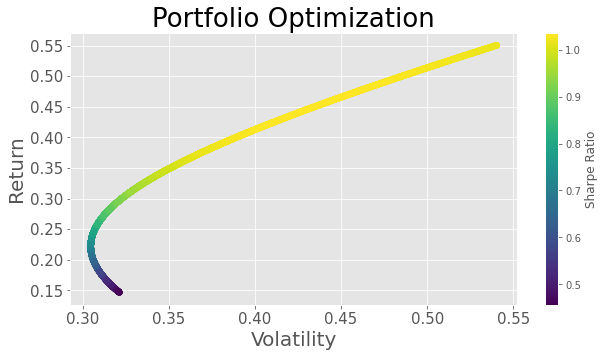

In [212]:
plt.figure(figsize = (10, 5))
plt.scatter(portfolio_risk, portfolio_return, c = portfolio_return / portfolio_risk) # c for colorbar based on sharpe.

plt.title('Portfolio Optimization', fontsize = 26)

plt.xlabel('Volatility', fontsize = 20)
plt.ylabel('Return', fontsize = 20)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.colorbar(label = 'Sharpe Ratio')

plt.show()

# Note first run for TSLA and BCA for 5 portfolios, and then 100 portfolios and then 10000 portfolios.
# Finally, make it 5 stocks and 20000 portfolios.


### Comparison with individual assets:

In [180]:
returns

,TSLA,BAC
Date,,
2013-12-31,NaN,NaN
2014-01-02,-0.002194,0.034040
2014-01-03,-0.003598,0.019255
2014-01-06,-0.017117,0.015235
2014-01-07,0.016054,-0.009604
...,...,...
2020-11-16,-0.001004,0.021481
2020-11-17,0.082139,-0.001088
2020-11-18,0.101968,-0.020690


In [182]:
returns.mean() # daily returns of the two stocks.

TSLA    0.002186
BAC     0.000582
dtype: float64

In [178]:
returns.std() # dailty standard deviation of the two stocks.

TSLA    0.034063
BAC     0.020238
dtype: float64

In [183]:
returns.mean() * 252 # annual returns of the two stocks.

TSLA    0.550826
BAC     0.146610
dtype: float64

In [184]:
returns.std() * 252 # annual standard deviations of the two stocks.

TSLA    8.583791
BAC     5.100024
dtype: float64

In [186]:
returns.std() * np.sqrt(252) # annual standard deviations of the two stocks. This one seems more reasonable. 
# check out this link: https://www.fool.com/knowledge-center/how-to-calculate-annualized-volatility.aspx

TSLA    0.540728
BAC     0.321271
dtype: float64